/data -- folder containing the data  
/models -- folder containing saved models (.pt extension)  
AutoEncoder.ipynb -- mark1 autoencoder, fun to play with   
AutoEncoder.py -- contains classes for all versions of the autoencoder  
MNIST.py -- to get the data  
train.py -- to train and save the model, change the name to prevent overlap  



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import spatial
import os
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms

from MNIST import MNIST
from AutoEncoder import AutoEncoder_v2, AutoEncoder_v3, AutoEncoder_v4
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f'training hardware: {device}')

training hardware: cuda


In [2]:
path = os.getcwd()+'/data'
trainset = MNIST(path+'/mnist_train.csv', transform = transforms.ToTensor())
testset = MNIST(path+'/mnist_test.csv', transform = transforms.ToTensor())

trainloader = DataLoader(trainset, batch_size = 8, shuffle = True)
testloader = DataLoader(testset, batch_size = 8, shuffle = True)

In [3]:
encoding_dim = 32 #32 for saved models
model1 = AutoEncoder_v2(encoding_dim = 32).to(device)
model2 = AutoEncoder_v3(encoding_dim = 32).to(device)
model3 = AutoEncoder_v4(encoding_dim = 32).to(device)

In [4]:
model1.load_state_dict(torch.load(os.getcwd()+'/models/AE_v2.pt'))
print(model1)

AutoEncoder_v2(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): ReLU()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


In [5]:
model2.load_state_dict(torch.load(os.getcwd()+'/models/AE_v3.pt'))
print(model2)

AutoEncoder_v3(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): ReLU()
    (4): Linear(in_features=256, out_features=32, bias=True)
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=784, bias=True)
    (5): Sigmoid()
  )
)


In [6]:
model3.load_state_dict(torch.load(os.getcwd()+'/models/AE_v4.pt'))
print(model3)

AutoEncoder_v4(
  (encoder): Sequential(
    (0): Linear(in_features=784, out_features=32, bias=True)
    (1): Tanh()
  )
  (decoder): Sequential(
    (0): Linear(in_features=32, out_features=784, bias=True)
    (1): Sigmoid()
  )
)


In [7]:
def convert(image):
    image = image.to('cpu').detach().squeeze().numpy()
    return image

In [8]:
images, labels = iter(testloader).next()
print(labels)

tensor([6, 2, 7, 7, 5, 9, 9, 2])


In [9]:
img1 = images[1]
img2 = images[7]

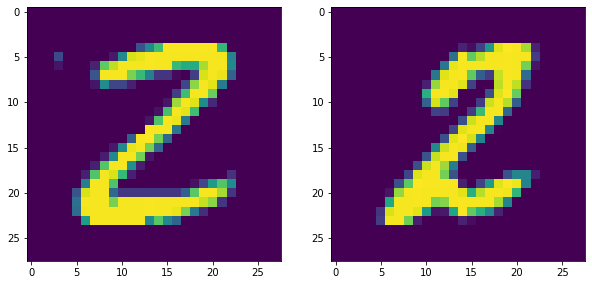

In [10]:
fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(convert(img1))
ax[1].imshow(convert(img2))

## Encoding and reconstruction by AutoEncoder_v2

In [11]:
img1 = img1.view(img1.size(0), -1).to(device)
img2 = img2.view(img2.size(0), -1).to(device)
encoding1 = model1.encode(img1)
encoding2 = model1.encode(img2)
reconstruction1 = model1.decode(encoding1)
reconstruction2 = model1.decode(encoding2)

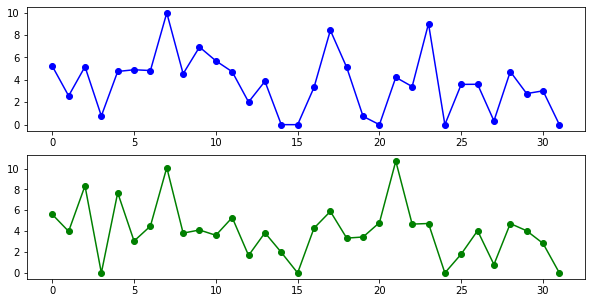

In [12]:
n = np.arange(32)
fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].scatter(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[0].plot(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[1].scatter(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')
ax[1].plot(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')

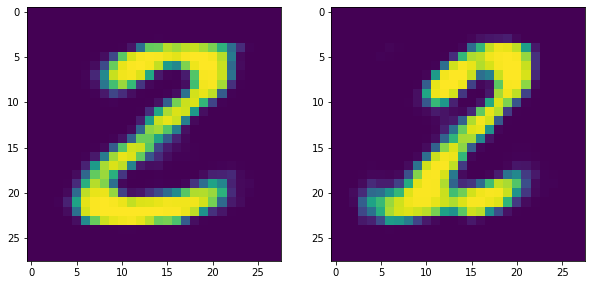

In [13]:
output1 = model1.decode(encoding1).view(1,28,28)
output2 = model1.decode(encoding2).view(1,28,28)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(convert(output1))
ax[1].imshow(convert(output2))

## Encoding and reconstruction by AutoEncoder_v3

In [14]:
img1 = img1.view(img1.size(0), -1).to(device)
img2 = img2.view(img2.size(0), -1).to(device)
encoding1 = model2.encode(img1)
encoding2 = model2.encode(img2)
reconstruction1 = model2.decode(encoding1)
reconstruction2 = model2.decode(encoding2)

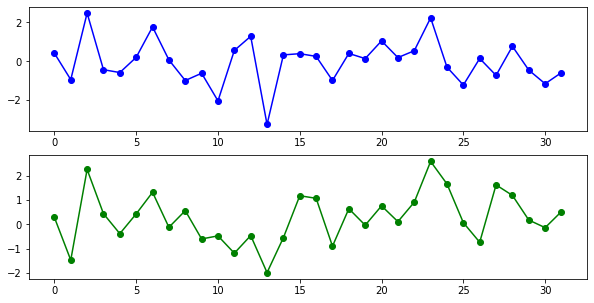

In [15]:
n = np.arange(32)
fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].scatter(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[0].plot(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[1].scatter(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')
ax[1].plot(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')

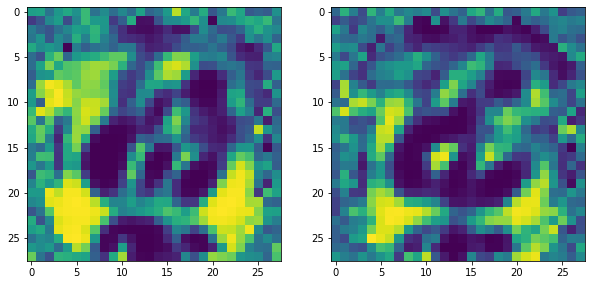

In [16]:
output1 = model1.decode(encoding1).view(1,28,28)
output2 = model1.decode(encoding2).view(1,28,28)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(convert(output1))
ax[1].imshow(convert(output2))

## Encoding and reconstruction by AutoEncoder_v3

In [17]:
img1 = img1.view(img1.size(0), -1).to(device)
img2 = img2.view(img2.size(0), -1).to(device)
encoding1 = model3.encode(img1)
encoding2 = model3.encode(img2)
reconstruction1 = model3.decode(encoding1)
reconstruction2 = model3.decode(encoding2)

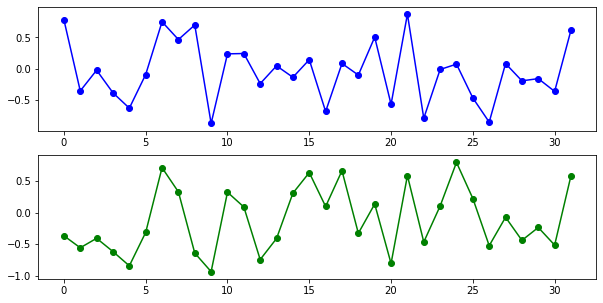

In [18]:
n = np.arange(32)
fig, ax = plt.subplots(2,1, figsize = (10,5))
ax[0].scatter(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[0].plot(n, encoding1.squeeze().cpu().detach().numpy(), color = 'b')
ax[1].scatter(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')
ax[1].plot(n, encoding2.squeeze().cpu().detach().numpy(), color = 'g')

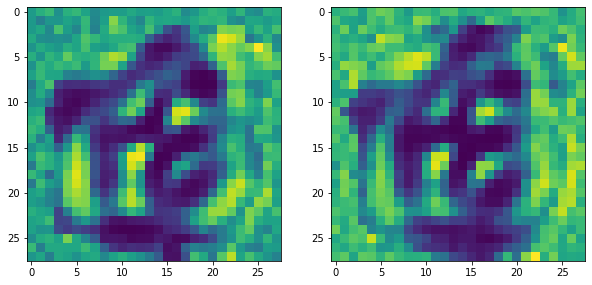

In [19]:
output1 = model1.decode(encoding1).view(1,28,28)
output2 = model1.decode(encoding2).view(1,28,28)

fig, ax = plt.subplots(1,2, figsize = (10,5))
ax[0].imshow(convert(output1))
ax[1].imshow(convert(output2))